In [126]:
import torch
import numpy as np
import os

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from matplotlib import pyplot
import torchvision # torch package for vision related things
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
from tqdm import tqdm  # For nice progress bar!

In [127]:
train_dataset = datasets.EMNIST(root="EMNIST/processed/training.pt", split='letters', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.EMNIST(root="EMNIST/processed/test.pt", split='letters', train=False, transform=transforms.ToTensor(), download=True)

Normalizar 

In [128]:
Y_TRAIN = train_dataset.targets
X_TRAIN = train_dataset.data/ 255 # Normalizacion

Y_TEST = test_dataset.targets
X_TEST = test_dataset.data/ 255 # Normalizacion

Convertir a 2D

In [129]:
X_TRAIN = torch.flatten(X_TRAIN, start_dim=1)
X_TRAIN.shape,Y_TRAIN.shape

X_TEST = torch.flatten(X_TEST, start_dim=1)
X_TEST.shape,Y_TRAIN.shape
print(X_TRAIN.shape," Dimensiones de la matriz X")
print(Y_TRAIN.shape," Dimensiones de la matriz Y")

torch.Size([124800, 784])  Dimensiones de la matriz X
torch.Size([124800])  Dimensiones de la matriz Y


In [130]:
X_TRAIN = X_TRAIN.numpy()
Y_TRAIN = Y_TRAIN.numpy()

X_TEST = X_TEST.numpy()
Y_TEST = Y_TEST.numpy()

# X1 = (X_TRAIN == 17).astype(np.int)
# Y1 = (Y_TRAIN == 17).astype(np.int)
# X2 = (X_TRAIN == 18).astype(np.int)
# Y2 = (Y_TRAIN == 18).astype(np.int)
# X3 = (X_TRAIN == 19).astype(np.int)
# Y3 = (Y_TRAIN == 19).astype(np.int)
# X4 = (X_TRAIN == 20).astype(np.int)
# Y4 = (Y_TRAIN == 20).astype(np.int)
# X5 = (X_TRAIN == 21).astype(np.int)
# Y5 = (Y_TRAIN == 21).astype(np.int)
# X6 = (X_TRAIN == 22).astype(np.int)
# Y6 = (Y_TRAIN == 22).astype(np.int)
# X7 = (X_TRAIN == 23).astype(np.int)
# Y7 = (Y_TRAIN == 23).astype(np.int)
# X8 = (X_TRAIN == 24).astype(np.int)
# Y8 = (Y_TRAIN == 24).astype(np.int)
# X9 = (X_TRAIN == 25).astype(np.int)
# Y9 = (Y_TRAIN == 25).astype(np.int)
# X10 = (X_TRAIN == 26).astype(np.int)
# Y10 = (Y_TRAIN == 26).astype(np.int)

In [149]:
X_t = torch.from_numpy(X_TRAIN).float()
Y_t = torch.from_numpy(Y_TRAIN).long()


Funcion graficadora de algunas imagenes de X

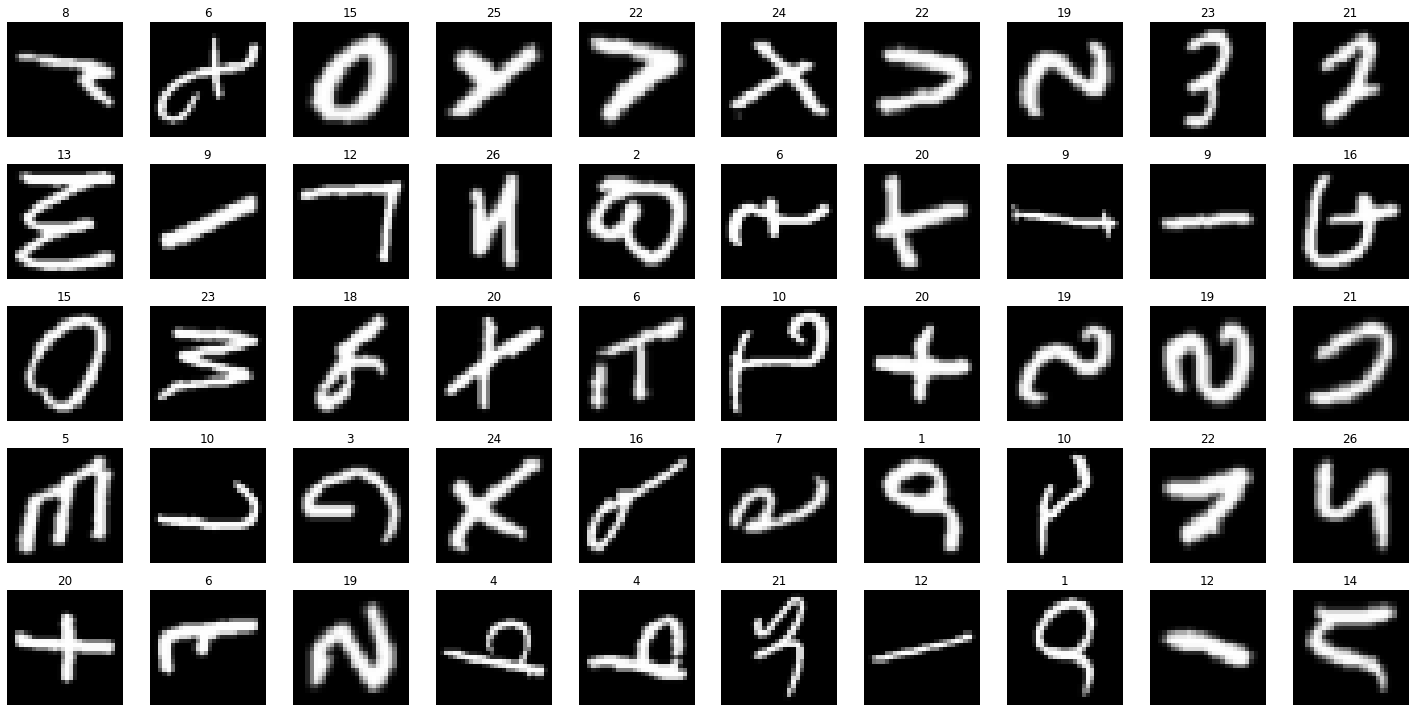

In [140]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import random 

r, c = 5, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X_TRAIN)-1)
        img = X_TRAIN[ix]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(Y_TRAIN[ix])
plt.tight_layout()
plt.show()


In [141]:
class Model(torch.nn.Module):
    
    # constructor
    def __init__(self, D_in, H, D_out):
        
        # llamamos al constructor de la clase madre
        super(Model, self).__init__()
        
        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)
        
    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [157]:
model = Model(784, 50, 28)
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 28])

In [158]:
def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [159]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

epochs = 1000
log_each = 10
l = []
model.train()
y_pred = 0
for e in range(1, epochs+1): 
    
    # forward
    y_pred = model(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        
y_pred = evaluate(torch.from_numpy(X_TEST).float())
accuracy_score(Y_TEST, y_pred.cpu().numpy())

Epoch 10/1000 Loss 2.91170
Epoch 20/1000 Loss 2.72473
Epoch 30/1000 Loss 2.45693
Epoch 40/1000 Loss 2.22971
Epoch 50/1000 Loss 2.05794
Epoch 60/1000 Loss 1.92448
Epoch 70/1000 Loss 1.81718
Epoch 80/1000 Loss 1.72689
Epoch 90/1000 Loss 1.65478
Epoch 100/1000 Loss 1.58714
Epoch 110/1000 Loss 1.52888
Epoch 120/1000 Loss 1.47645
Epoch 130/1000 Loss 1.43213
Epoch 140/1000 Loss 1.38895
Epoch 150/1000 Loss 1.35352
Epoch 160/1000 Loss 1.32051
Epoch 170/1000 Loss 1.28907
Epoch 180/1000 Loss 1.26066
Epoch 190/1000 Loss 1.23508
Epoch 200/1000 Loss 1.21158
Epoch 210/1000 Loss 1.18704
Epoch 220/1000 Loss 1.16701
Epoch 230/1000 Loss 1.14651
Epoch 240/1000 Loss 1.12833
Epoch 250/1000 Loss 1.10995
Epoch 260/1000 Loss 1.09433
Epoch 270/1000 Loss 1.07838
Epoch 280/1000 Loss 1.06358
Epoch 290/1000 Loss 1.04870
Epoch 300/1000 Loss 1.03449
Epoch 310/1000 Loss 1.02132
Epoch 320/1000 Loss 1.00927
Epoch 330/1000 Loss 0.99909
Epoch 340/1000 Loss 0.98720
Epoch 350/1000 Loss 0.97636
Epoch 360/1000 Loss 0.96555
E

0.8564903846153846

Aplicacndo metricas

In [160]:
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=28, bias=True)
)


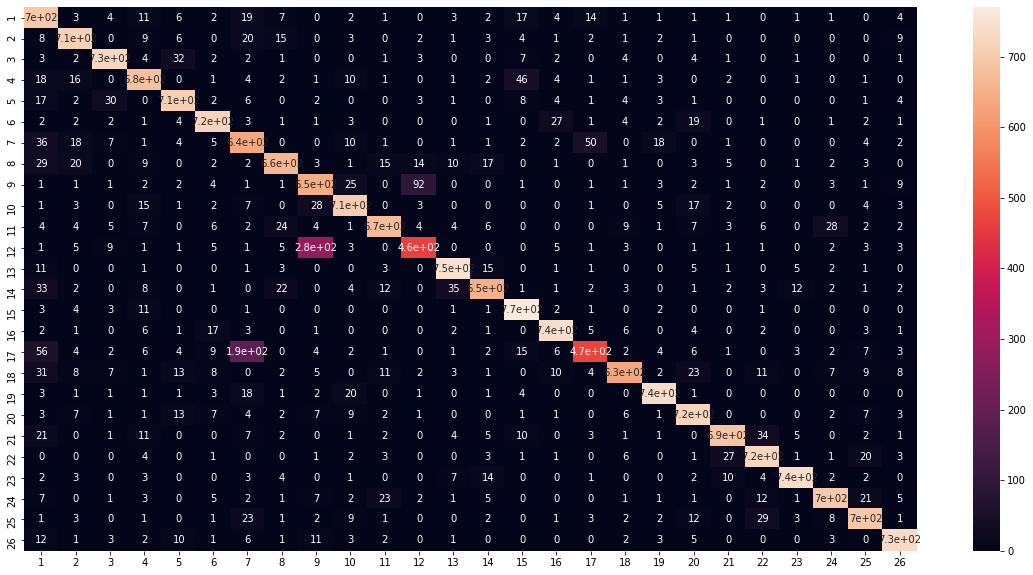

In [164]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import seaborn as sn

y_pred = evaluate(torch.from_numpy(X_TEST).float())
cm = confusion_matrix(Y_TEST, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(1,27)], columns = [i for i in range(1,27)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()